### Clustering: Univariate and Bivariate

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [36]:
df = pd.read_csv("/Users/sandeepsrinivasdwaram/Documents/business_failures/business_failures_franceData_2014-2024.csv")

In [37]:
df

,YearQuarterId,YearGroupId,Year,Quarter,FailureUnit,Zone,ZoneCategory,Location,Capital,Region,Direction,LocationCategory,CalandarYear
0,2018-Q1,G2018,01/01/2018,Q1,26,1,Low,Ariège,Foix,Occitanie,South,D,2018
1,2018-Q1,G2018,01/01/2018,Q1,44,1,Low,Cher,Bourges,Centre-ValdeLoire,Central,D,2018
2,2018-Q1,G2018,01/01/2018,Q1,87,2,Medium,Côtes-d'Armor,SaintBrieuc,Bretagne,NorthWest,D,2018
3,2018-Q1,G2018,01/01/2018,Q1,116,3,High,Dordogne,\tPérigueux,Nouvelle-Aquitaine,SouthWest,D,2018
4,2018-Q1,G2018,01/01/2018,Q1,84,2,Medium,Doubs,\tBesançon,Bourgogne-Franche-Comté,East,D,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4967,2017-Q4,G2017,01/10/2017,Q4,139,3,High,Martinique,Fort-de-France,Nil,Nil,C,2017
4968,2017-Q4,G2017,01/10/2017,Q4,7,1,Low,FrenchGuiana,Cayenne,Nil,Nil,C,2017
4969,2017-Q4,G2017,01/10/2017,Q4,110,3,High,Guadeloupe,Basse-Terre,Nil,Nil,C,2017
4970,2017-Q4,G2017,01/10/2017,Q4,9,1,Low,FrenchTeritories,Nil,Nil,Nil,C,2017


Clustering: Univariate and Bivariate

In [38]:
clustering1 = KMeans(n_clusters=4)

In [39]:
clustering1.fit(df[['FailureUnit']])

KMeans(n_clusters=4)

In [40]:
clustering1.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [41]:
df['FU_clusters'] = clustering1.labels_
df.head()

,YearQuarterId,YearGroupId,Year,Quarter,FailureUnit,Zone,ZoneCategory,Location,Capital,Region,Direction,LocationCategory,CalandarYear,FU_clusters
0,2018-Q1,G2018,01/01/2018,Q1,26,1,Low,Ariège,Foix,Occitanie,South,D,2018,0
1,2018-Q1,G2018,01/01/2018,Q1,44,1,Low,Cher,Bourges,Centre-ValdeLoire,Central,D,2018,0
2,2018-Q1,G2018,01/01/2018,Q1,87,2,Medium,Côtes-d'Armor,SaintBrieuc,Bretagne,NorthWest,D,2018,0
3,2018-Q1,G2018,01/01/2018,Q1,116,3,High,Dordogne,\tPérigueux,Nouvelle-Aquitaine,SouthWest,D,2018,0
4,2018-Q1,G2018,01/01/2018,Q1,84,2,Medium,Doubs,\tBesançon,Bourgogne-Franche-Comté,East,D,2018,0


In [42]:
df['FU_clusters'].value_counts()

FU_clusters
0    4143
2     583
1     214
3      32
Name: count, dtype: int64

In [43]:
clustering1.inertia_

63255727.41037812

In [44]:
intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['FailureUnit']])
    intertia_scores.append(kmeans.inertia_)

In [45]:
intertia_scores

[711952411.6790025,
 232522091.97559252,
 128605944.74905348,
 63255727.41037813,
 42973938.12847321,
 27854329.372133307,
 21742134.724081166,
 16217937.185485039,
 13179933.866218468,
 11357347.397043392]

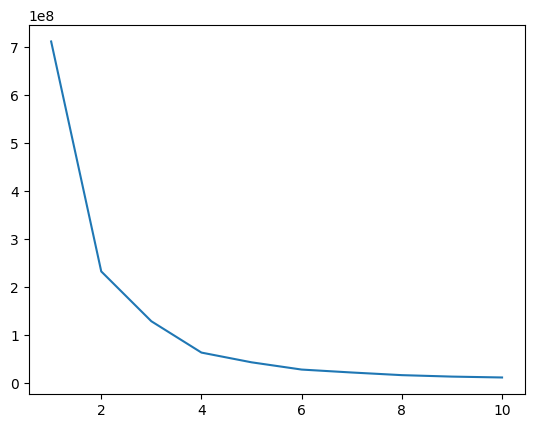

In [46]:
plt.plot(range(1,11),intertia_scores);

In [47]:
df.columns

Index(['YearQuarterId', 'YearGroupId', 'Year', 'Quarter', 'FailureUnit',
       'Zone', 'ZoneCategory', 'Location', 'Capital', 'Region', 'Direction',
       'LocationCategory', 'CalandarYear', 'FU_clusters'],
      dtype='object')

In [48]:
df.groupby('FU_clusters')[['FailureUnit','CalandarYear','Zone']].mean()

,FailureUnit,CalandarYear,Zone
FU_clusters,,,
0,93.766594,2019.066136,2.196235
1,1346.074766,2018.397196,4.000000
2,516.941681,2018.777015,4.000000
3,3070.312500,2018.218750,4.000000


In [49]:
clustering2 = KMeans(n_clusters=6)

In [50]:
clustering2.fit(df[['FailureUnit','CalandarYear']])

KMeans(n_clusters=6)

In [51]:
clustering1.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [52]:
df['FY'] = clustering2.labels_
df.head()

,YearQuarterId,YearGroupId,Year,Quarter,FailureUnit,Zone,ZoneCategory,Location,Capital,Region,Direction,LocationCategory,CalandarYear,FU_clusters,FY
0,2018-Q1,G2018,01/01/2018,Q1,26,1,Low,Ariège,Foix,Occitanie,South,D,2018,0,0
1,2018-Q1,G2018,01/01/2018,Q1,44,1,Low,Cher,Bourges,Centre-ValdeLoire,Central,D,2018,0,0
2,2018-Q1,G2018,01/01/2018,Q1,87,2,Medium,Côtes-d'Armor,SaintBrieuc,Bretagne,NorthWest,D,2018,0,0
3,2018-Q1,G2018,01/01/2018,Q1,116,3,High,Dordogne,\tPérigueux,Nouvelle-Aquitaine,SouthWest,D,2018,0,0
4,2018-Q1,G2018,01/01/2018,Q1,84,2,Medium,Doubs,\tBesançon,Bourgogne-Franche-Comté,East,D,2018,0,0


In [53]:
df['FY'].value_counts()

FY
0    3429
2     898
3     366
1     177
5      74
4      28
Name: count, dtype: int64

In [54]:
clustering2.inertia_

27905864.34075339

In [55]:
intertia_scores2=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['FailureUnit','CalandarYear']])
    intertia_scores2.append(kmeans.inertia_)

In [56]:
intertia_scores2

[712002131.6588895,
 232562526.6030218,
 128655524.28087059,
 63305303.357990995,
 43949722.18554925,
 27857887.628122866,
 21786482.073840536,
 16386517.773205694,
 13994350.583138406,
 11027169.998170588]

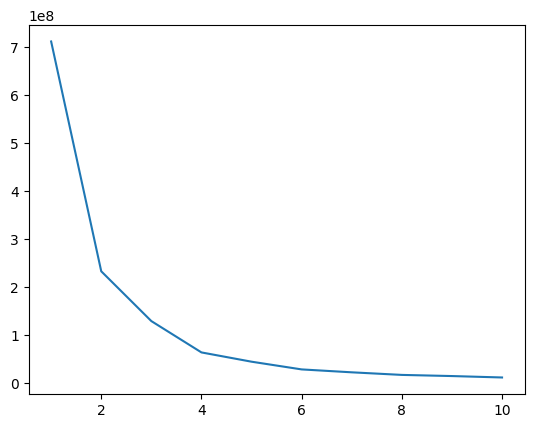

In [57]:
plt.plot(range(1,11),intertia_scores2);

In [58]:
df.columns

Index(['YearQuarterId', 'YearGroupId', 'Year', 'Quarter', 'FailureUnit',
       'Zone', 'ZoneCategory', 'Location', 'Capital', 'Region', 'Direction',
       'LocationCategory', 'CalandarYear', 'FU_clusters', 'FY'],
      dtype='object')

In [59]:
clustering1.cluster_centers_

array([[  93.9208876 ],
       [1348.00938967],
       [ 518.74354561],
       [3070.3125    ]])

In [60]:
clustering2.cluster_centers_

array([[  66.81743949, 2019.19130942],
       [1117.78977273, 2018.69318182],
       [ 249.32962138, 2018.52115813],
       [ 567.91825613, 2018.74659401],
       [3177.10714286, 2018.17857143],
       [1743.66216216, 2018.10810811]])

In [61]:
cluster2centers = pd.DataFrame(clustering2.cluster_centers_)

In [62]:
cluster2centers

,0,1
0,66.817439,2019.191309
1,1117.789773,2018.693182
2,249.329621,2018.521158
3,567.918256,2018.746594
4,3177.107143,2018.178571
5,1743.662162,2018.108108


In [63]:
cluster1centers = pd.DataFrame(clustering1.cluster_centers_)

In [64]:
cluster1centers

,0
0,93.920888
1,1348.009390
2,518.743546
3,3070.312500


In [65]:
cluster2centers.columns = ['x', 'y']

In [66]:
cluster2centers

,x,y
0,66.817439,2019.191309
1,1117.789773,2018.693182
2,249.329621,2018.521158
3,567.918256,2018.746594
4,3177.107143,2018.178571
5,1743.662162,2018.108108


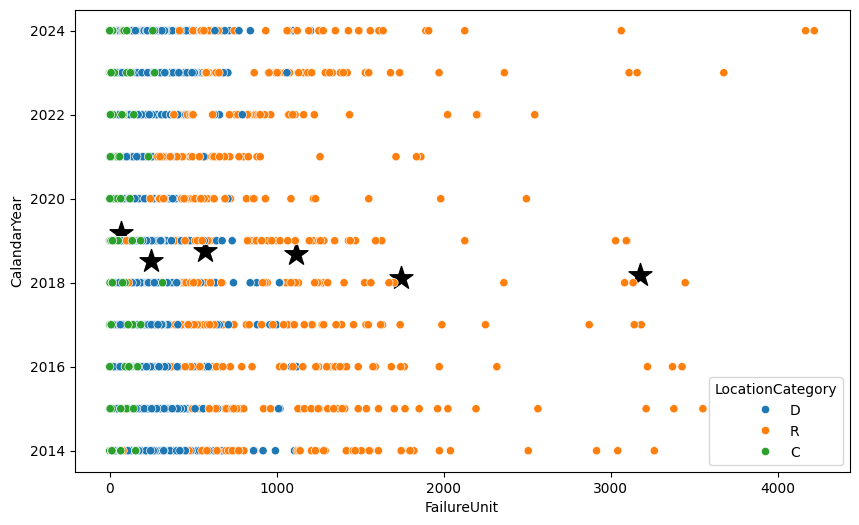

In [67]:
plt.figure(figsize=(10,6))
plt.scatter(x = cluster2centers['x'], y = cluster2centers['y'], s = 300, c = 'black', marker = '*')
sns.scatterplot(data = df, x = 'FailureUnit', y = 'CalandarYear', hue = 'LocationCategory', palette = 'tab10');

In [68]:
pd.crosstab(df['FY'],df['LocationCategory'],normalize='index')

LocationCategory,C,D,R
FY,,,
0,0.058909,0.924759,0.016331
1,0.000000,0.129944,0.870056
2,0.018931,0.916481,0.064588
3,0.002732,0.445355,0.551913
4,0.000000,0.000000,1.000000
5,0.000000,0.000000,1.000000
